# Discretization

Discretization (or binning) is the process of converting continuous features into discrete bins or intervals. This is often used in preprocessing for:
Simplifying models,Handling non-linear relationships,Making features interpretable,Preparing data for models that prefer categorical input (e.g., decision trees)

To handle Outliers, To improve value spread

# Types of Binning 

### Supervised

### Unsupervised

### Custom

# Supervised

### Equal width or Uniform Binning

### Equal Frequency

### KMeans

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df= pd.read_csv("C:\\Users\\utkar\\Downloads\\train.csv", usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.shape

(891, 3)

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(714, 3)

In [9]:
X= df.iloc[:,1:]
y = df.iloc[:,0]

In [10]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
clf= DecisionTreeClassifier()

In [12]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred= clf.predict(X_test)

In [14]:
accuracy_score(y_test,y_pred)

0.6153846153846154

In [15]:
kbin_age= KBinsDiscretizer(n_bins=10,encode='ordinal',strategy="quantile")
kbin_fare= KBinsDiscretizer(n_bins=10,encode='ordinal',strategy="quantile")

In [16]:
trf= ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [17]:
X_train_trf= trf.fit_transform(X_train)
X_test_trf= trf.transform(X_test)

In [18]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [19]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [20]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [21]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())



In [22]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [23]:
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [24]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6359154929577465)

In [25]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6288536776212832


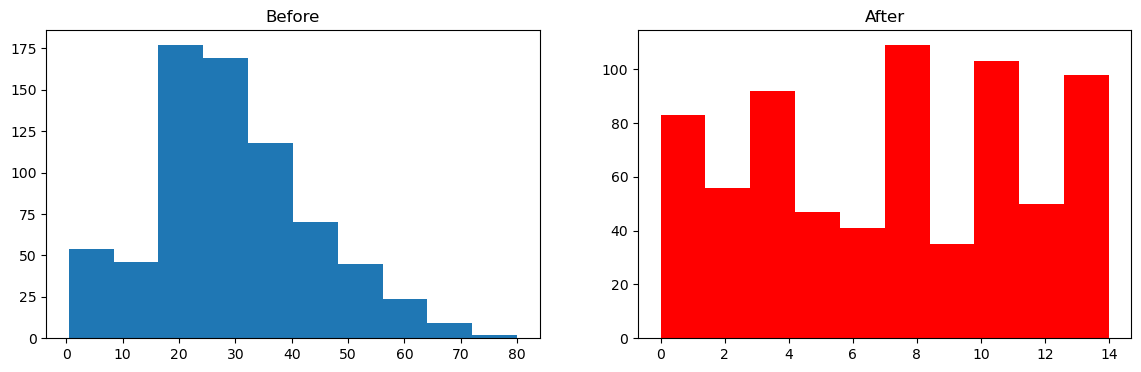

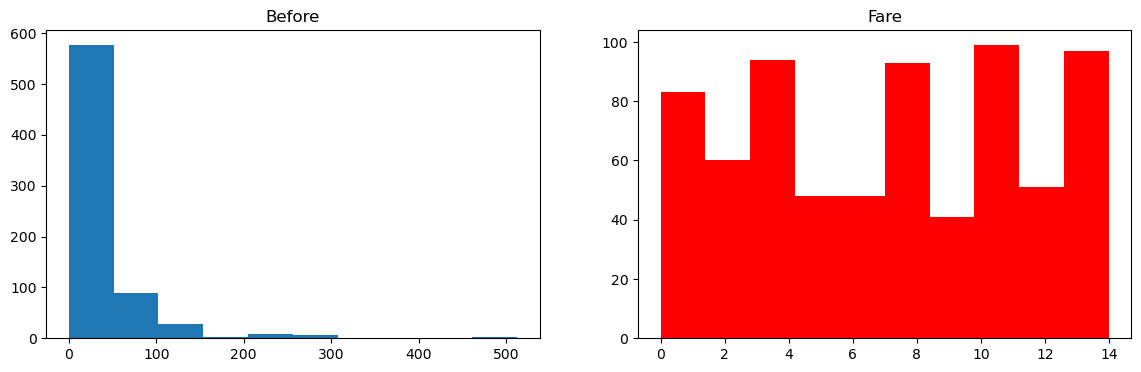

In [31]:
discretize(15,'quantile')